6/6 [==============================] - 0s 2ms/step


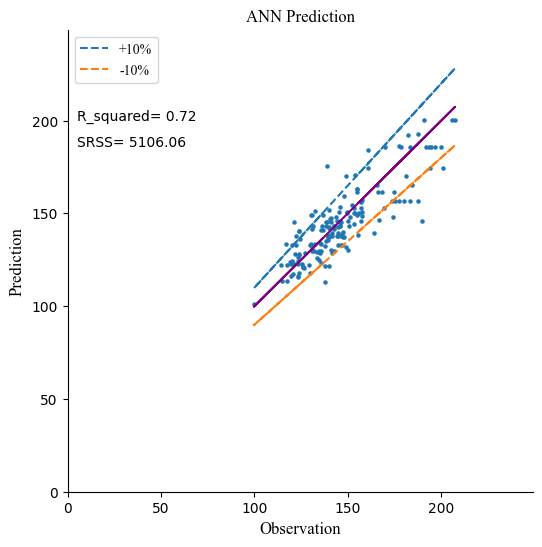

In [2]:
# %tensorboard --logdir logs/fit
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# if tf.test.gpu_device_name() != '/device:GPU:0':
#   print('WARNING: GPU device not found.')
# else:
#   print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

#读入数据
df = pd.read_excel('C:/Users/Tongrui/Desktop/UHPC1.xlsx')
df= df.dropna()
# df = df.sort_values(by=df.columns[11],ascending=False)
RawD=(df.iloc[:,:12].values).astype(np.float64)
permuted_indices = np.random.permutation(RawD.shape[0])
RawD = RawD[permuted_indices]
TrainD= RawD[:int(RawD.shape[0] * 0.8)]
TestD = RawD[int(RawD.shape[0] * 0.8):]

xT=TrainD[:,:11]
yT=TrainD[:,11]

x=TestD[:,:11]
y=TestD[:,11]
y_up=y*1.1
y_down=y*0.9

model1 = tf.keras.Sequential([tf.keras.layers.Input(shape=(11,)),
                              tf.keras.layers.Dense(64,activation='relu',kernel_initializer='glorot_normal'),
                              #tf.keras.layers.Dense(32,activation='tanh',kernel_initializer='glorot_normal'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(64,activation='tanh',kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                              #tf.keras.layers.Dense(32,activation='tanh',kernel_initializer='glorot_normal'),
                              tf.keras.layers.Dense(1,)])
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='mse')
model1.fit(xT,yT,epochs=10000,verbose=0,validation_split=0.2, callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/fit/", histogram_freq=1)])
loss, accuracy = model1.evaluate(xT, yT)
py1=model1.predict(x)

r_squared = r2_score(y,py1)
srss = np.sqrt(np.sum((y-py1)**2)/len(y))

plt.figure(figsize=(6, 6))
plt.title('ANN Prediction',font='times new roman',fontsize=12)
plt.axis([0, np.max(y)*1.2, 0,  np.max(y)*1.2])
plt.xlabel('Observation',font='times new roman',fontsize=12)
plt.xticks(font='times new roman',fontsize=12)
plt.ylabel('Prediction',font='times new roman',fontsize=12)
plt.yticks(font='times new roman',fontsize=12)
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["bottom"].set_position(("data", 0))
plt.gca().spines["left"].set_position(("data", 0))
plt.plot(y, y_up, label='+10%',linestyle='--')#模型6（Gaussion）
plt.plot(y, y, linestyle='-', color='purple')
plt.plot(y, y_down, label='-10%',linestyle='--')#模型6（Gaussion）
plt.scatter(y,py1,s=5)
plt.legend(loc='upper left',prop='times new roman',fontsize=12)
plt.text(5, 210, "Loss= %.2f" % loss,font='times new roman',fontsize=12)
plt.text(5, 195, "Max std= %.2f" % maxstd,font='times new roman',fontsize=12)
plt.text(5, 180, "$R^{2}$= %.2f" % r_squared,font='times new roman',fontsize=12)
plt.text(5, 165, "SRSS= %.2f" % srss,font='times new roman',fontsize=12)
plt.savefig('C:/Users/Tongrui/Desktop/2.jpeg')
plt.show()
# %tensorboard --logdir logs/fit